In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch
import numpy as np
import torchvision
import matplotlib.pyplot as plt
from discriminator_dataset import DiscriminatorDataset
from train import train
from image_regressor_model import ImageRegressor

In [3]:
device = torch.device("cuda")

In [4]:
torch.cuda.empty_cache()
model = ImageRegressor(1).to(device)
torch.cuda.empty_cache()
print("Number of parameters:", model.getNumberOfParameters())

Number of parameters: 1244545


In [5]:
dataset = DiscriminatorDataset()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

In [6]:
def loss(prediction, label):
    prediction = 0.999*prediction + 0.0005
    return -torch.sum(label*torch.log(prediction) + (1-label)*torch.log(1-prediction))

In [7]:
model = train(model, optimizer, loss, dataset, device, epochs=15, batchSize=16)

Epoch 1/15
----------

Progress: 100%

Loss: 0.5683 Accuracy: 0.7162 Duration: 3m 11s

Epoch 2/15
----------

Progress: 100%

Loss: 0.4896 Accuracy: 0.7852 Duration: 2m 16s

Epoch 3/15
----------

Progress: 100%

Loss: 0.4658 Accuracy: 0.7916 Duration: 2m 5s

Epoch 4/15
----------

Progress: 100%

Loss: 0.4359 Accuracy: 0.8085 Duration: 1m 59s

Epoch 5/15
----------

Progress: 100%

Loss: 0.4287 Accuracy: 0.8127 Duration: 1m 53s

Epoch 6/15
----------

Progress: 100%

Loss: 0.4068 Accuracy: 0.8264 Duration: 1m 58s

Epoch 7/15
----------

Progress: 100%

Loss: 0.3880 Accuracy: 0.8340 Duration: 2m 1s

Epoch 8/15
----------

Progress: 100%

Loss: 0.3853 Accuracy: 0.8320 Duration: 1m 50s

Epoch 9/15
----------

Progress: 100%

Loss: 0.3497 Accuracy: 0.8489 Duration: 1m 23s

Epoch 10/15
----------

Progress: 100%

Loss: 0.3433 Accuracy: 0.8525 Duration: 1m 17s

Epoch 11/15
----------

Progress: 100%

Loss: 0.3314 Accuracy: 0.8598 Duration: 1m 21s

Epoch 12/15
----------

Progress: 100%

Los

In [8]:
torch.save(model, 'trained_models/abstract_image_discriminator.pkl')

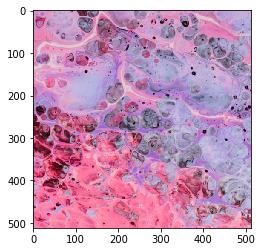

Predicted to be abstract with 91.72% probability


In [33]:
randomSample = dataset[np.random.randint(len(dataset))]
pilImage = torchvision.transforms.ToPILImage()(randomSample[0])
plt.imshow(pilImage)
plt.show()

model.eval()
prediction = model(torch.unsqueeze(randomSample[0], dim=0).to(device)).item()
model.train()
if prediction >= 0.5:
    print("Predicted to be abstract with {:.2f}% probability".format(prediction*100))
else:
    print("Predicted to be realistic with {:.2f}% probability".format((1-prediction)*100))